In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('..\data\Cleaned_data.csv')
df.head()

,reference_number,watch_URL,brand,parent_model,specific_model,nickname,marketing_name,currency,price,image_URL,...,bracelet_material,bracelet_color,clasp_type,movement,caliber,power_reserve,frequency,jewels,features,description
0,B313/04281 - 313.200.87/0F01 HS10,https://www.corum-watches.com/collections/gold...,Corum,Golden Bridge collection,Golden Bridge Avant-Garde,Titanium And Diamonds,Limited edition: 25,CHF,46000.0,https://www.corum-watches.com/wp-content/uploa...,...,Alligator leather,Black,Triple-blade folding clasp,Automatic,CO 313,40 hours,"4 Hz, 28’800 vph",26.0,"Hour, minute",In celebration of the 10th anniversary of the ...
1,B313/04280 - 313.200.77/0F01 HS15,https://www.corum-watches.com/collections/gold...,Corum,Golden Bridge collection,Golden Bridge Avant-Garde,Titanium - Gold And Diamonds,Limited edition: 100,CHF,53000.0,https://www.corum-watches.com/wp-content/uploa...,...,Alligator leather,Black,Triple-blade folding clasp,Automatic,CO 313,40 hours,"4 Hz, 28’800 vph",26.0,"Hour, minute",In celebration of the 10th anniversary of the ...
2,B313/04279 - 313.200.86/0F01 HS15,https://www.corum-watches.com/collections/gold...,Corum,Golden Bridge collection,Golden Bridge Avant-Garde,Titanium And Gold,Limited edition: 150,CHF,48300.0,https://www.corum-watches.com/wp-content/uploa...,...,Alligator leather,Black,Triple-blade folding clasp,Automatic,CO 313,40 hours,"4 Hz, 28’800 vph",26.0,"Hour, minute",In celebration of the 10th anniversary of the ...
3,B313/04278 - 313.200.95/0F01 HS10,https://www.corum-watches.com/collections/gold...,Corum,Golden Bridge collection,Golden Bridge Avant-Garde,Titanium,Limited edition: 50,CHF,39200.0,https://www.corum-watches.com/wp-content/uploa...,...,Alligator leather,Black,Triple-blade folding clasp,Automatic,CO 313,40 hours,"4 Hz, 28’800 vph",26.0,"Hour, minute",In celebration of the 10th anniversary of the ...
4,B113/03853 - 113.358.85/0F02 0000,https://www.corum-watches.com/collections/gold...,Corum,Golden Bridge collection,Golden Bridge Classic,Rose Gold Snow-Set,NaN,CHF,73700.0,https://www.corum-watches.com/wp-content/uploa...,...,Alligator leather,Brown,Triple-blade folding clasp,Hand-wound,CO 113,40 hours,"4 Hz, 28’800 vph",19.0,"Hour, minute","Launched by CORUM in 1980, the Golden Bridge m..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reference_number   95 non-null     object 
 1   watch_URL          95 non-null     object 
 2   brand              95 non-null     object 
 3   parent_model       95 non-null     object 
 4   specific_model     95 non-null     object 
 5   nickname           89 non-null     object 
 6   marketing_name     36 non-null     object 
 7   currency           94 non-null     object 
 8   price              94 non-null     float64
 9   image_URL          95 non-null     object 
 10  made_in            95 non-null     object 
 11  case_material      94 non-null     object 
 12  diameter           94 non-null     object 
 13  between_lugs       94 non-null     object 
 14  case_thickness     94 non-null     object 
 15  water_resistance   94 non-null     object 
 16  bracelet_material  94 non-nu

In [4]:
# Change data type
df['brand'] = df['brand'].astype('category')
df['parent_model'] = df['parent_model'].astype('category')
df['specific_model'] = df['specific_model'].astype('category')
df['currency'] = df['currency'].astype('category')
df['price'] = df['price'].astype(float)
df['made_in'] = df['made_in'].astype('category')
df['bracelet_material'] = df['bracelet_material'].astype('category')
df['bracelet_color'] = df['bracelet_color'].astype('category')
df['clasp_type'] = df['clasp_type'].astype('category')
df['movement'] = df['movement'].astype('category')
df['jewels'] = df['jewels'].astype(int)
df['features'] = df['features'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   reference_number   95 non-null     object  
 1   watch_URL          95 non-null     object  
 2   brand              95 non-null     category
 3   parent_model       95 non-null     category
 4   specific_model     95 non-null     category
 5   nickname           89 non-null     object  
 6   marketing_name     36 non-null     object  
 7   currency           94 non-null     category
 8   price              94 non-null     float64 
 9   image_URL          95 non-null     object  
 10  made_in            95 non-null     category
 11  case_material      94 non-null     object  
 12  diameter           94 non-null     object  
 13  between_lugs       94 non-null     object  
 14  case_thickness     94 non-null     object  
 15  water_resistance   94 non-null     object  
 16  bracelet_m

## Data Analysis

### 1- Total number of watches by collection


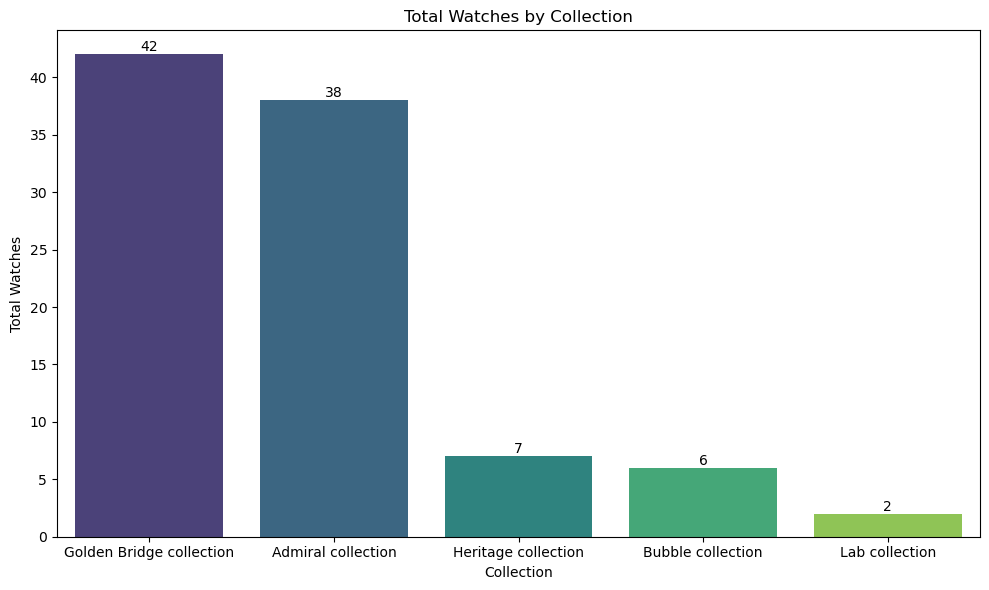

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='parent_model', order=df['parent_model'].value_counts().index, palette='viridis')
plt.title('Total Watches by Collection')
plt.xlabel('Collection')
plt.ylabel('Total Watches')
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### 2- Average price by collection

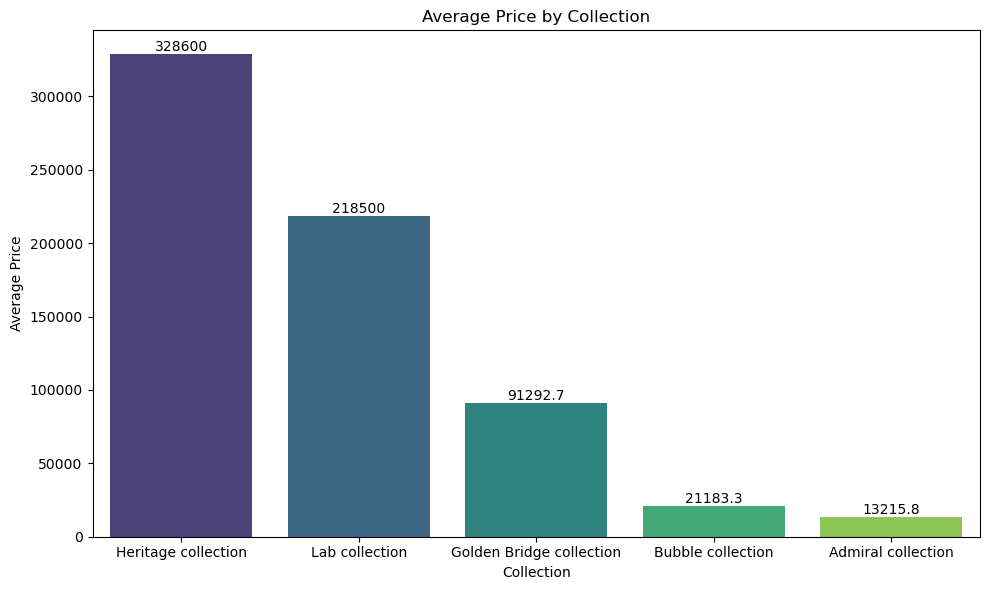

In [7]:
# Takes the average price by parent model
avg_price = df.groupby('parent_model')[['price']].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='parent_model', y='price', data=avg_price, order=avg_price.sort_values('price',ascending = False).parent_model, palette='viridis')
plt.title('Average Price by Collection')
plt.xlabel('Collection')
plt.ylabel('Average Price')
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### 3- Most expensive watches

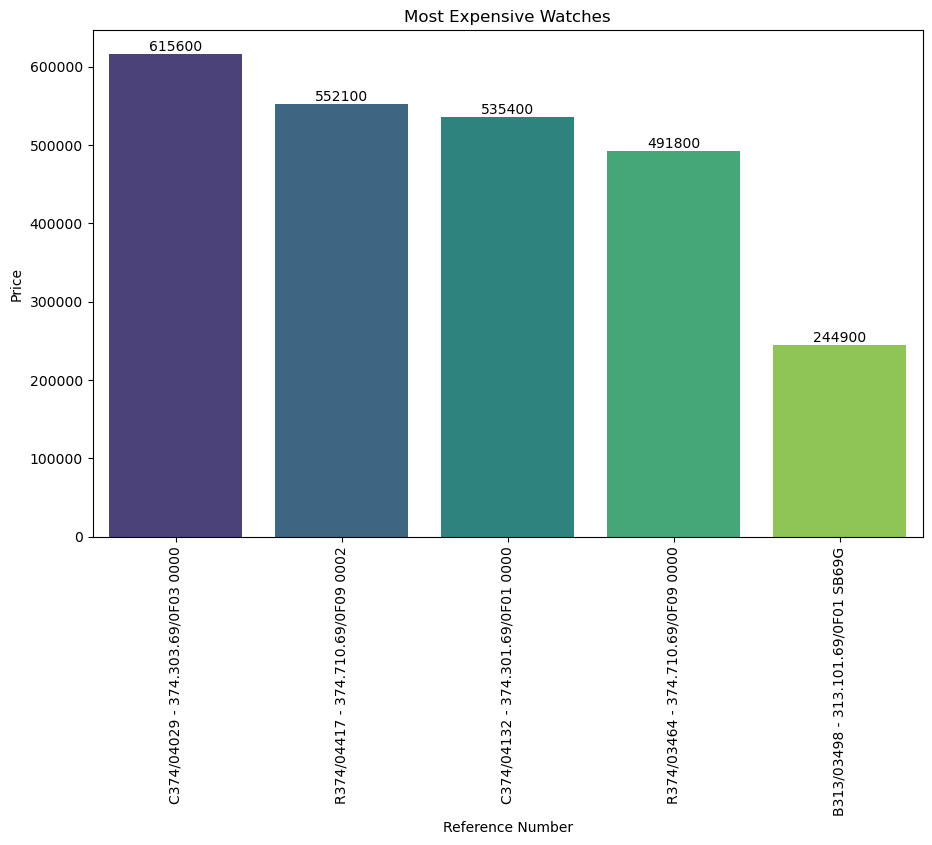

In [8]:
df_sorted = df.sort_values(by='price', ascending=False)

# Select the top 5 most expensive watches
top_5 = df_sorted.head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='reference_number', y='price', data=top_5, palette='viridis')
plt.title('Most Expensive Watches')
plt.xlabel('Reference Number')
plt.ylabel('Price')
plt.tight_layout()
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### 4- Watch color segmentation

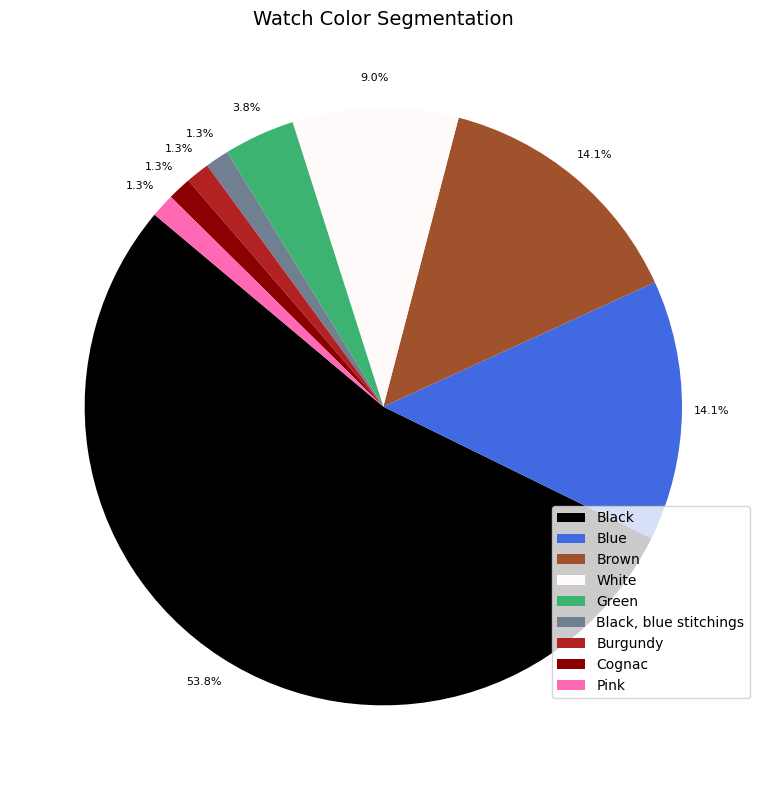

In [9]:
color_counts = df['bracelet_color'].value_counts().reset_index()
color_counts['color']= ['black', 'royalblue', 'sienna', 'snow', 'mediumseagreen', 'slategrey', 'firebrick', 'darkred', 'hotpink']


plt.figure(figsize=(8, 8))
plt.pie(color_counts['count'], colors=color_counts['color'], autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=1.2, textprops={'fontsize': 8})
plt.title('Watch Color Segmentation', fontsize=14)

labels = color_counts['bracelet_color']
plt.legend(labels, bbox_to_anchor=(1, 0.1), loc="lower right")
plt.tight_layout()
plt.show()
